In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display basic information
print(df.head())



   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [12]:
print(df.describe())


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [13]:
print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


In [14]:
# Check for missing values
print(df.isnull().sum())

# Feature scaling
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [17]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluate
print("Decision Tree:")
print(classification_report(y_test, y_pred_tree))


Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        63
           1       0.97      0.91      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



In [18]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Evaluate
print("Random Forest:")
print(classification_report(y_test, y_pred_forest))


Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [19]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



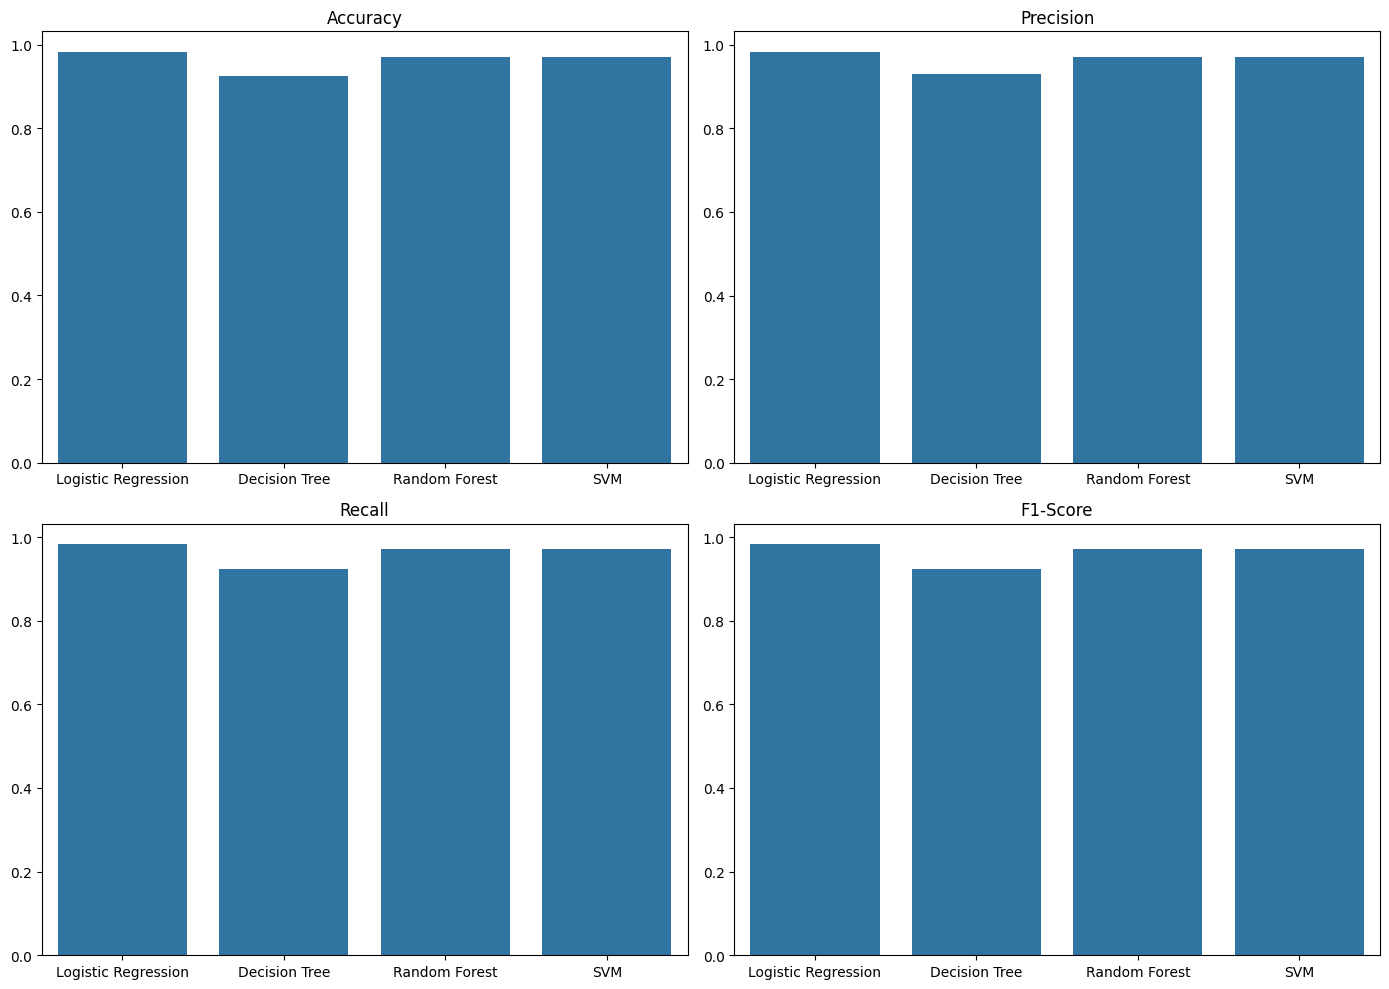

In [20]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy = [accuracy_score(y_test, y_pred_log_reg),
            accuracy_score(y_test, y_pred_tree),
            accuracy_score(y_test, y_pred_forest),
            accuracy_score(y_test, y_pred_svm)]

precision = [precision_score(y_test, y_pred_log_reg, average='weighted'),
             precision_score(y_test, y_pred_tree, average='weighted'),
             precision_score(y_test, y_pred_forest, average='weighted'),
             precision_score(y_test, y_pred_svm, average='weighted')]

recall = [recall_score(y_test, y_pred_log_reg, average='weighted'),
          recall_score(y_test, y_pred_tree, average='weighted'),
          recall_score(y_test, y_pred_forest, average='weighted'),
          recall_score(y_test, y_pred_svm, average='weighted')]

f1 = [f1_score(y_test, y_pred_log_reg, average='weighted'),
      f1_score(y_test, y_pred_tree, average='weighted'),
      f1_score(y_test, y_pred_forest, average='weighted'),
      f1_score(y_test, y_pred_svm, average='weighted')]

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.barplot(x=models, y=accuracy, ax=ax[0, 0])
ax[0, 0].set_title('Accuracy')

sns.barplot(x=models, y=precision, ax=ax[0, 1])
ax[0, 1].set_title('Precision')

sns.barplot(x=models, y=recall, ax=ax[1, 0])
ax[1, 0].set_title('Recall')

sns.barplot(x=models, y=f1, ax=ax[1, 1])
ax[1, 1].set_title('F1-Score')

plt.tight_layout()
plt.show()
